In [3]:
# Conectar-se ao Drive
from google.colab import drive

# https://docs.python.org/3/library/os.html
import os
import matplotlib.pyplot as plt

# skimage.io para carregar as imagens
# https://scikit-image.org/docs/dev/api/skimage.io.html
from skimage import io

# https://pandas.pydata.org/
import pandas as pd

In [4]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#Conforme indicado na monitoria, coloquei um atalho para a pasta
#onde estão os arquivos (/Shareddrives/Visão/EP1) na raiz do meu Google Drive

In [8]:
cd gdrive/MyDrive/EP1

/content/gdrive/Shareddrives/Visão/EP1


In [9]:
df = pd.read_csv('metadados.csv')
%load_ext google.colab.data_table
df

FILENAME CLASSE       ID    FUNDO    LUZ AMBIENTE
0     IMG_20210508_132122.jpg  garfo  garfo-0  amarelo    dia   dentro
1     IMG_20210508_132125.jpg  garfo  garfo-0  amarelo    dia   dentro
2     IMG_20210508_132128.jpg  garfo  garfo-0  amarelo    dia   dentro
3     IMG_20210508_132140.jpg  garfo  garfo-0    verde    dia   dentro
4     IMG_20210508_132142.jpg  garfo  garfo-0    verde    dia   dentro
...                       ...    ...      ...      ...    ...      ...
1075  IMG_20210508_181541.jpg  livro  livro-2    verde  noite     fora
1076  IMG_20210508_181545.jpg  livro  livro-2    verde  noite     fora
1077  IMG_20210508_181552.jpg  livro  livro-2     rosa  noite     fora
1078  IMG_20210508_181555.jpg  livro  livro-2     rosa  noite     fora
1079  IMG_20210508_181558.jpg  livro  livro-2     rosa  noite     fora

[1080 rows x 6 columns]

In [16]:
#TABELA GLOBAL SUMÁRIA
n_classes = len(df.CLASSE.unique())
n_imgs = len(df.FILENAME)
img = io.imread('dataset/IMG_20210508_135634.jpg')
res = "{} linhas por {} colunas".format(img.shape[0],img.shape[1])
s = ! du -sh -m dataset/
size = int(s[0].replace('\tdataset/',''))

l=[[n_classes,n_imgs,size,res]]
c=["Número de classes","Número de imagens","Tamanho da base (Megabytes)","Resolução das imagens"]
tgs = pd.DataFrame(l,columns=c)
tgs

Número de classes  ...         Resolução das imagens
0                 10  ...  4000 linhas por 3000 colunas

[1 rows x 4 columns]

In [11]:
#TABELA DETALHADA POR CLASSE
df_list = [] #LISTA CONTENDO DATAFRAMES FILTRADOS POR CLASSE

for c in df.CLASSE.unique():
  temp = df[(df['CLASSE']==c)]
  df_list.append(temp)

data = []
for d in range(len(df_list)):
  n_obj = len(df_list[d].ID.unique())
  fundos = df_list[d].FUNDO.unique()
  n_fundos = len(fundos)
  n_repeticoes = 3
  total = len(df_list[d])
  data.append([df_list[d].CLASSE.unique()[0],n_obj,"{} fundos: {},{},{}".format(n_fundos,fundos[0],fundos[1],fundos[2]),"Dia/Interno,Dia/Externo,Noite/Interno,Noite/Externo",n_repeticoes,total])

c=["Nome do objeto","Quantidade de objetos","Variações de fundo","Variações de iluminação","Número de repetições","Total de amostras"]
tdc = pd.DataFrame(data,columns=c)
tdc

Nome do objeto  ...  Total de amostras
0          garfo  ...                108
1           faca  ...                108
2           copo  ...                108
3         xícara  ...                108
4          lápis  ...                108
5          prato  ...                108
6          chave  ...                108
7        garrafa  ...                108
8        tesoura  ...                108
9          livro  ...                108

[10 rows x 6 columns]

In [15]:
#Exemplo de dataframe segmentado por classe:
seg = df_list[6] #6=chave
seg

FILENAME CLASSE       ID    FUNDO    LUZ AMBIENTE
162  IMG_20210508_133921.jpg  chave  chave-0  amarelo    dia   dentro
163  IMG_20210508_133922.jpg  chave  chave-0  amarelo    dia   dentro
164  IMG_20210508_133923.jpg  chave  chave-0  amarelo    dia   dentro
165  IMG_20210508_133929.jpg  chave  chave-0    verde    dia   dentro
166  IMG_20210508_133931.jpg  chave  chave-0    verde    dia   dentro
..                       ...    ...      ...      ...    ...      ...
994  IMG_20210508_180605.jpg  chave  chave-2    verde  noite     fora
995  IMG_20210508_180606.jpg  chave  chave-2    verde  noite     fora
996  IMG_20210508_180612.jpg  chave  chave-2     rosa  noite     fora
997  IMG_20210508_180617.jpg  chave  chave-2     rosa  noite     fora
998  IMG_20210508_180619.jpg  chave  chave-2     rosa  noite     fora

[108 rows x 6 columns]

In [14]:
#Função auxiliar para visualização
def print_imgset(df_c):
  print("Fotos de {}".format(df_c.CLASSE.unique()[0]))
  files = ["dataset/"+n for n in df_c.FILENAME]
  imgs = io.imread_collection(files)
  n_colunas, n_linhas = 9, 12
  fig, axs = plt.subplots(n_linhas, n_colunas, figsize=(20, 20))
  num_fotos = n_colunas * n_linhas
  for e, ob in enumerate(imgs[:num_fotos]):
      l, c = (e // n_colunas, e % n_colunas)
      axs[l, c].imshow(ob)
      axs[l, c].axis('off')
  plt.show()


Fotos de garfo


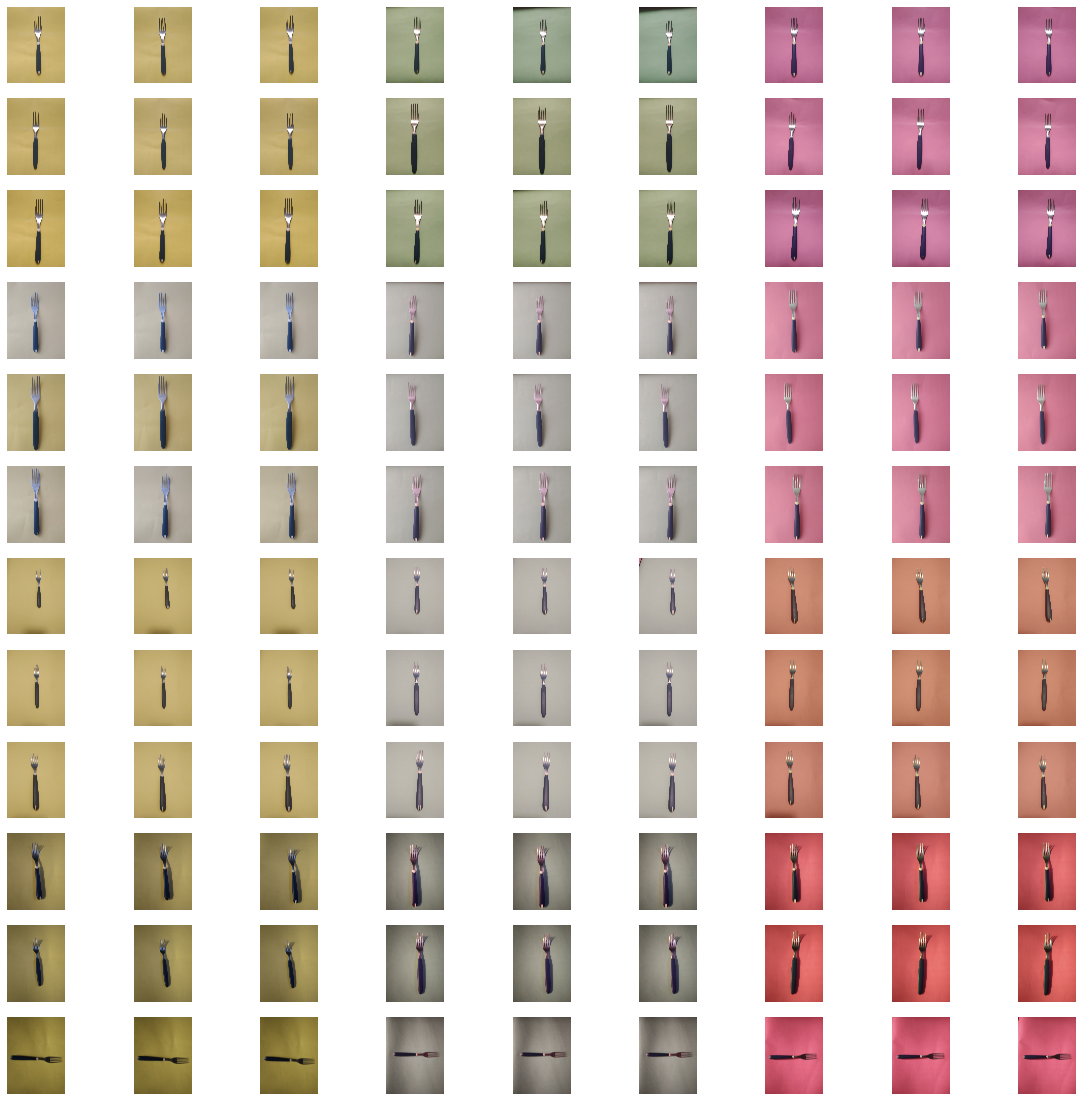

Fotos de faca


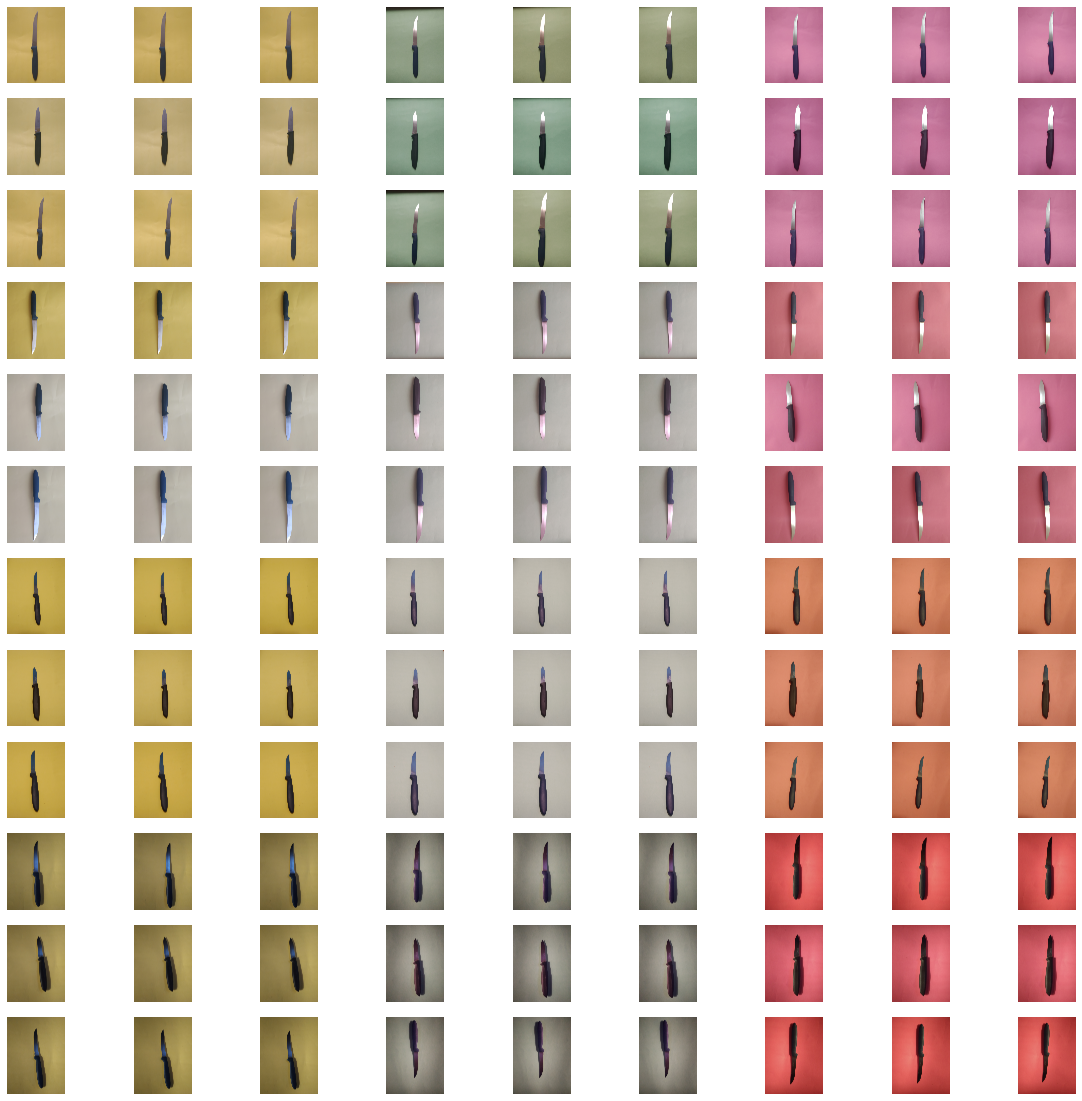

Fotos de copo


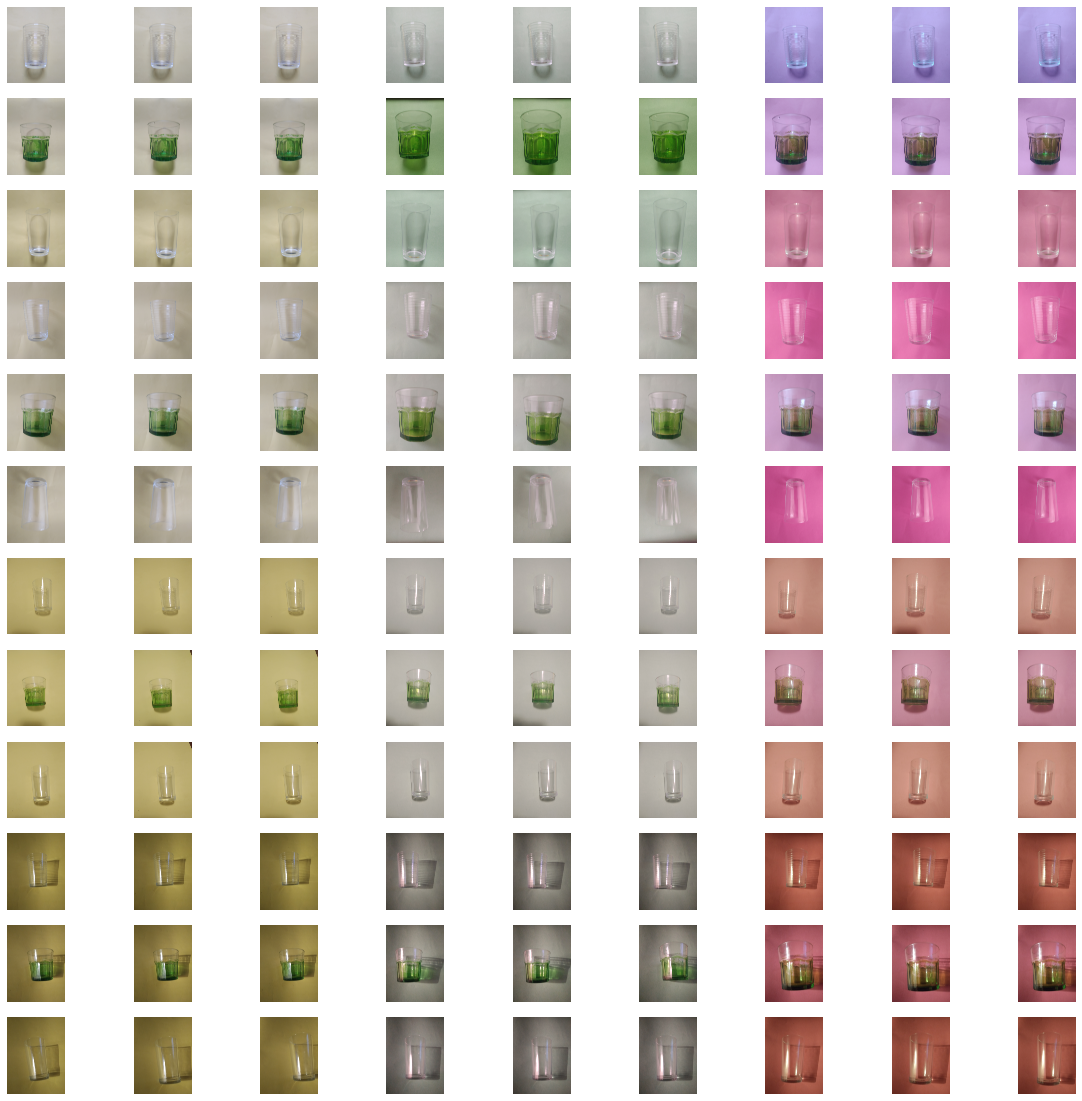

Fotos de xícara


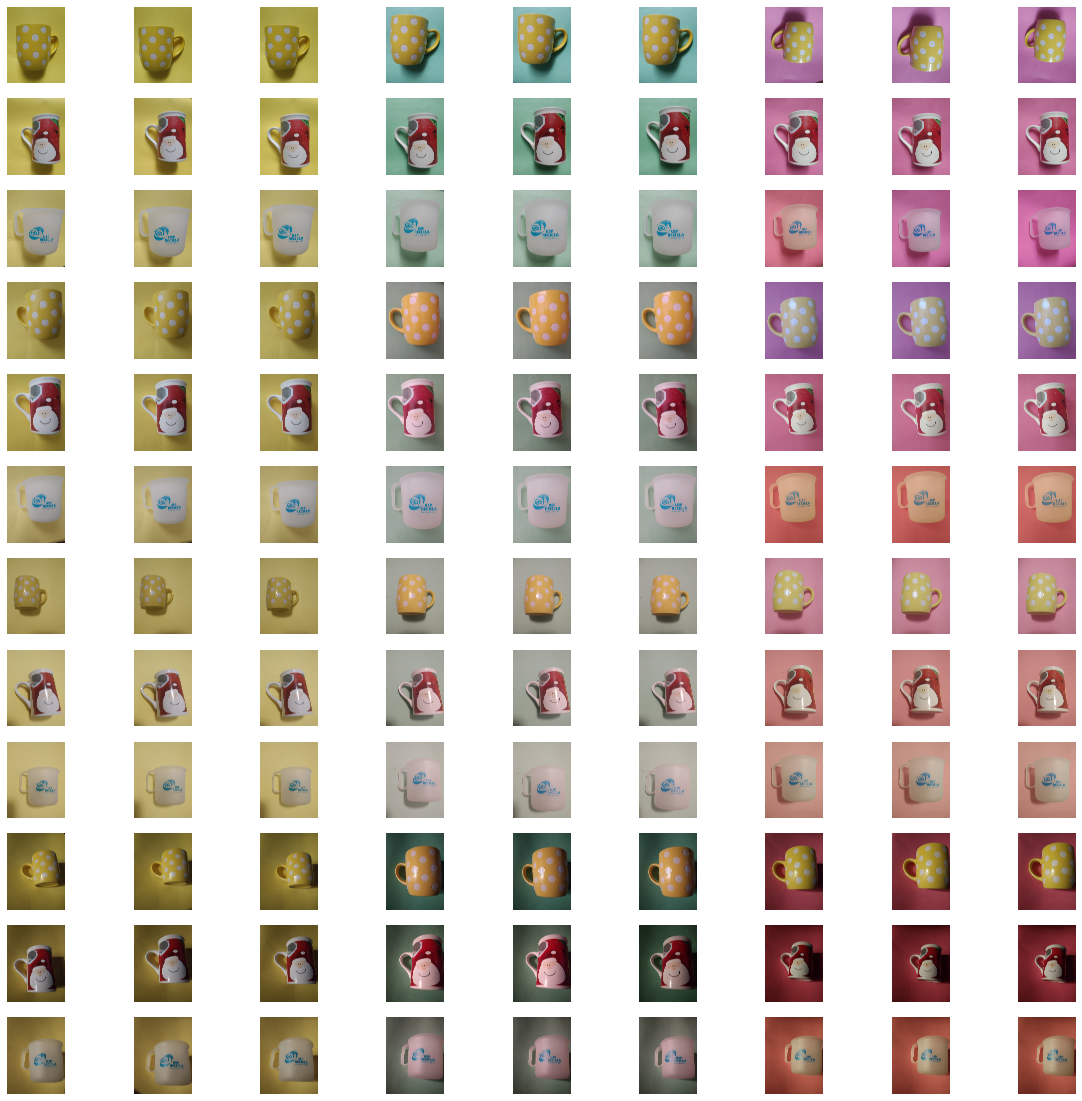

Fotos de lápis


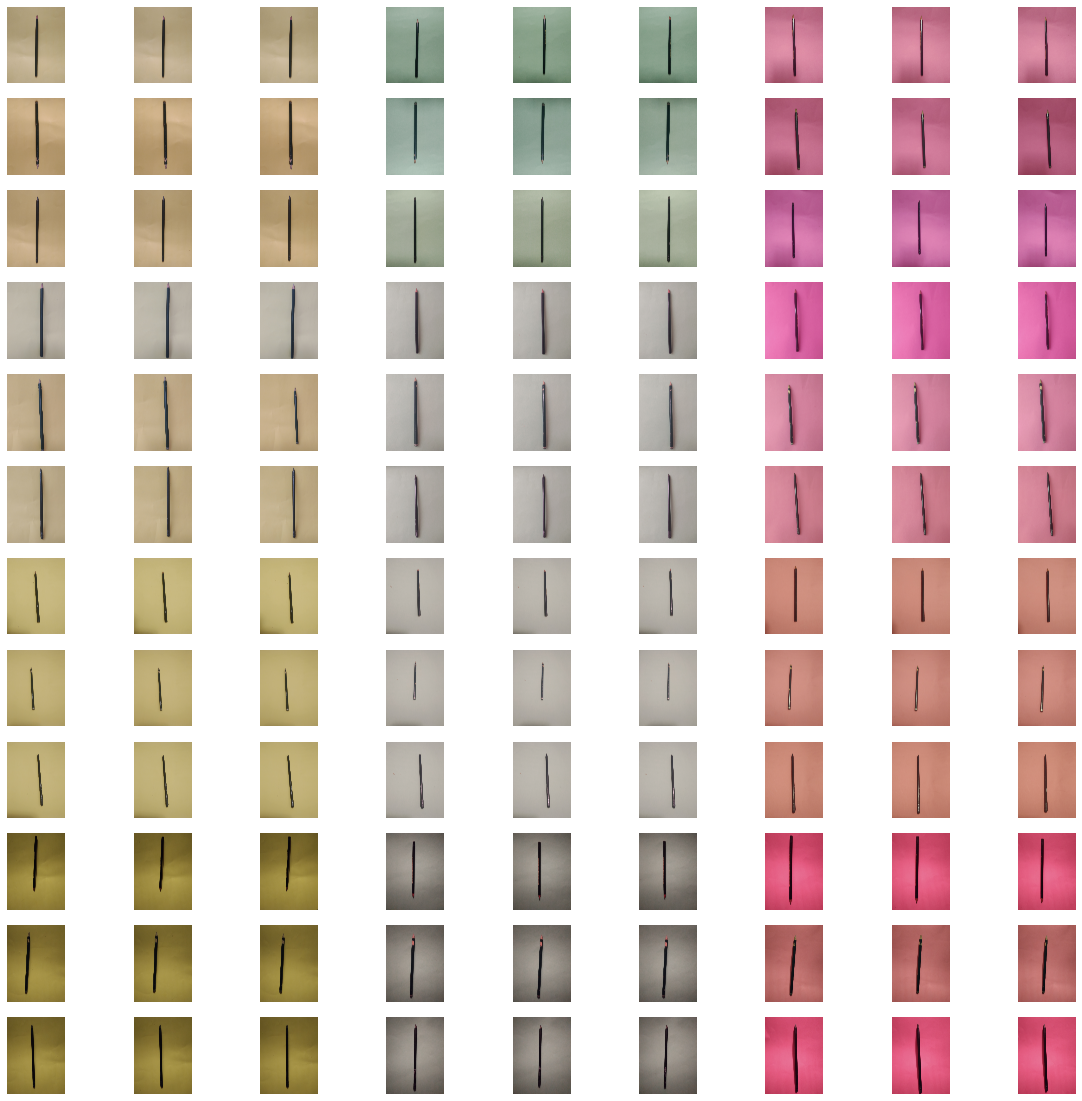

Fotos de prato


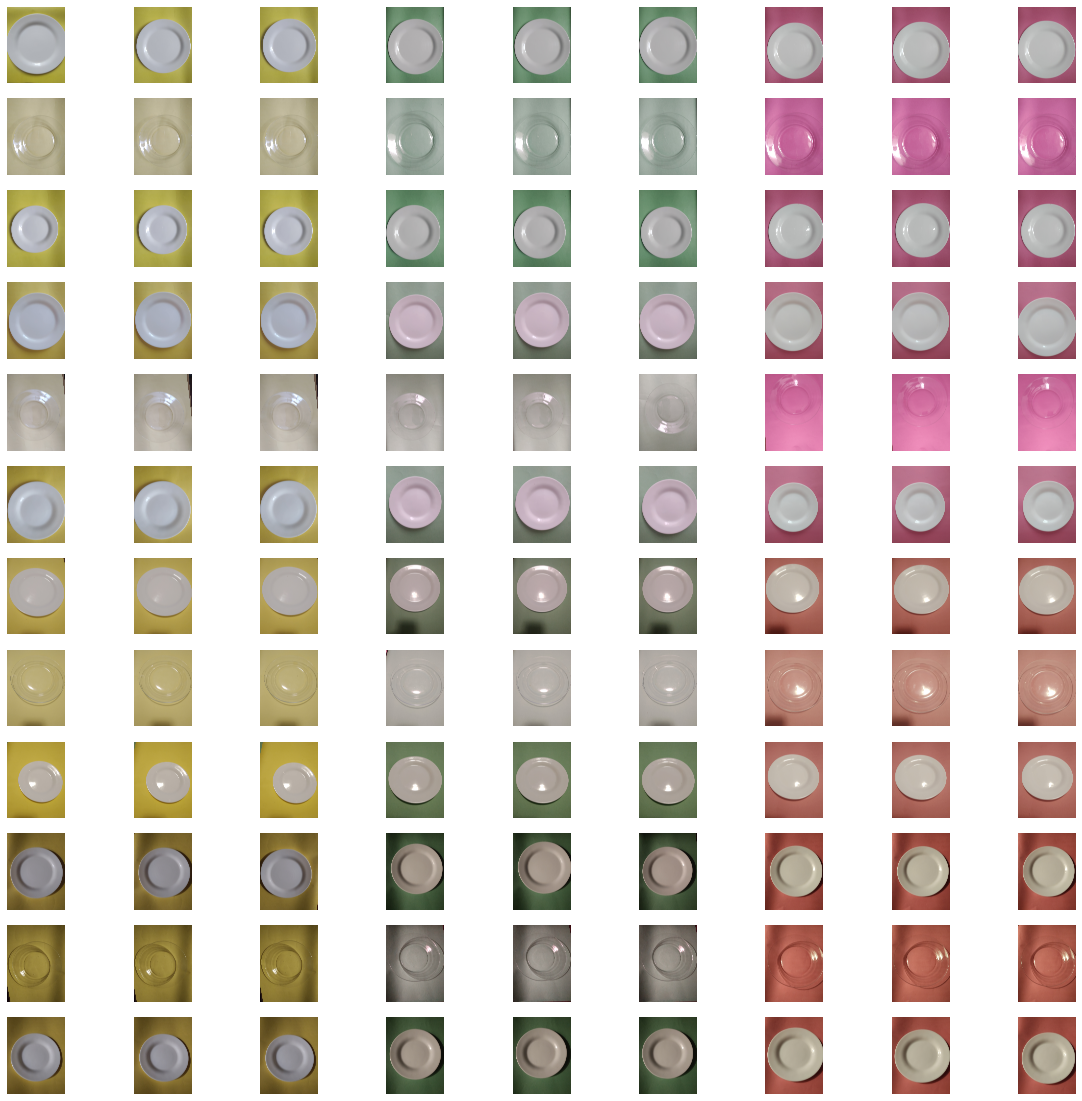

Fotos de chave


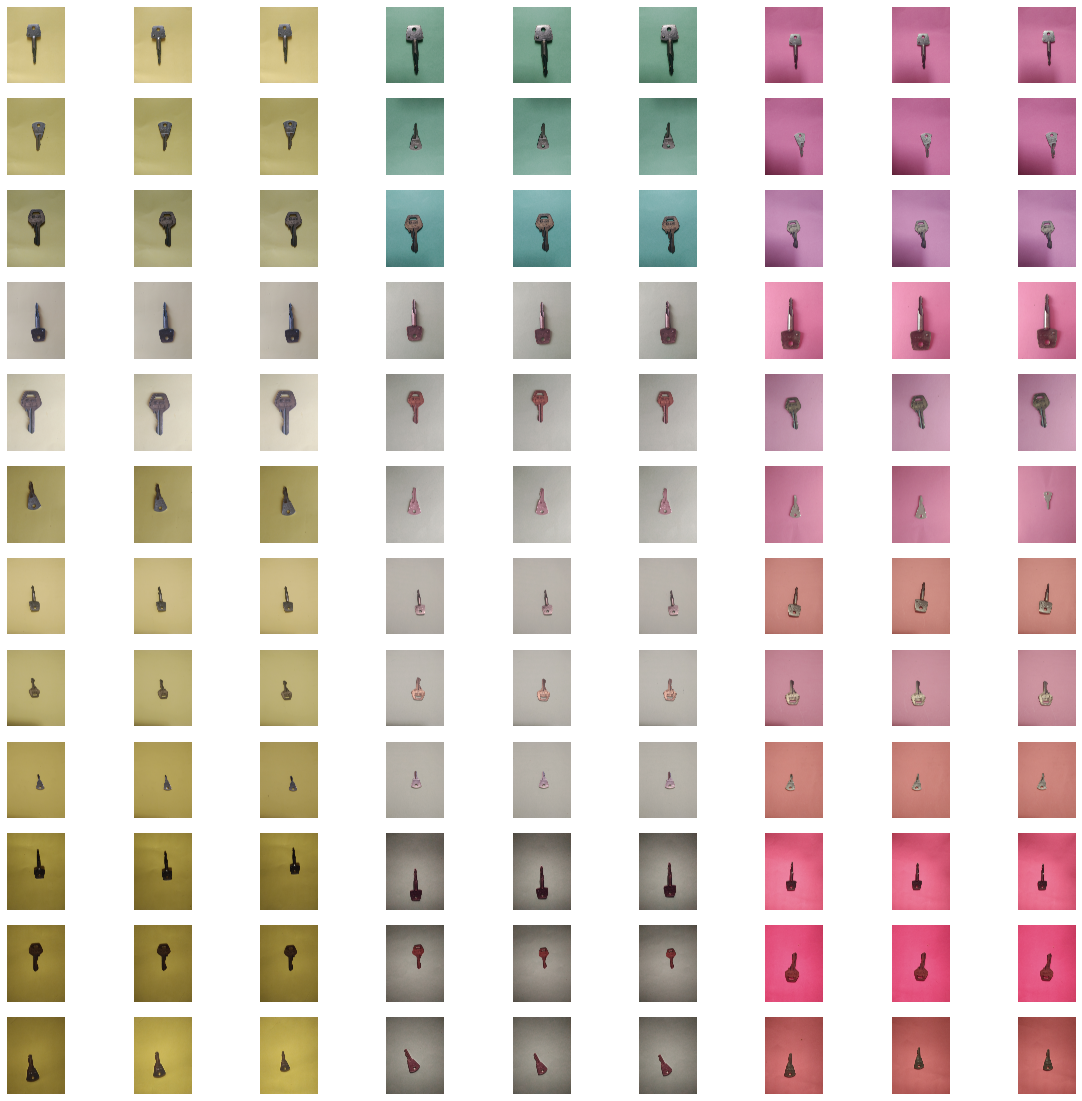

Fotos de garrafa


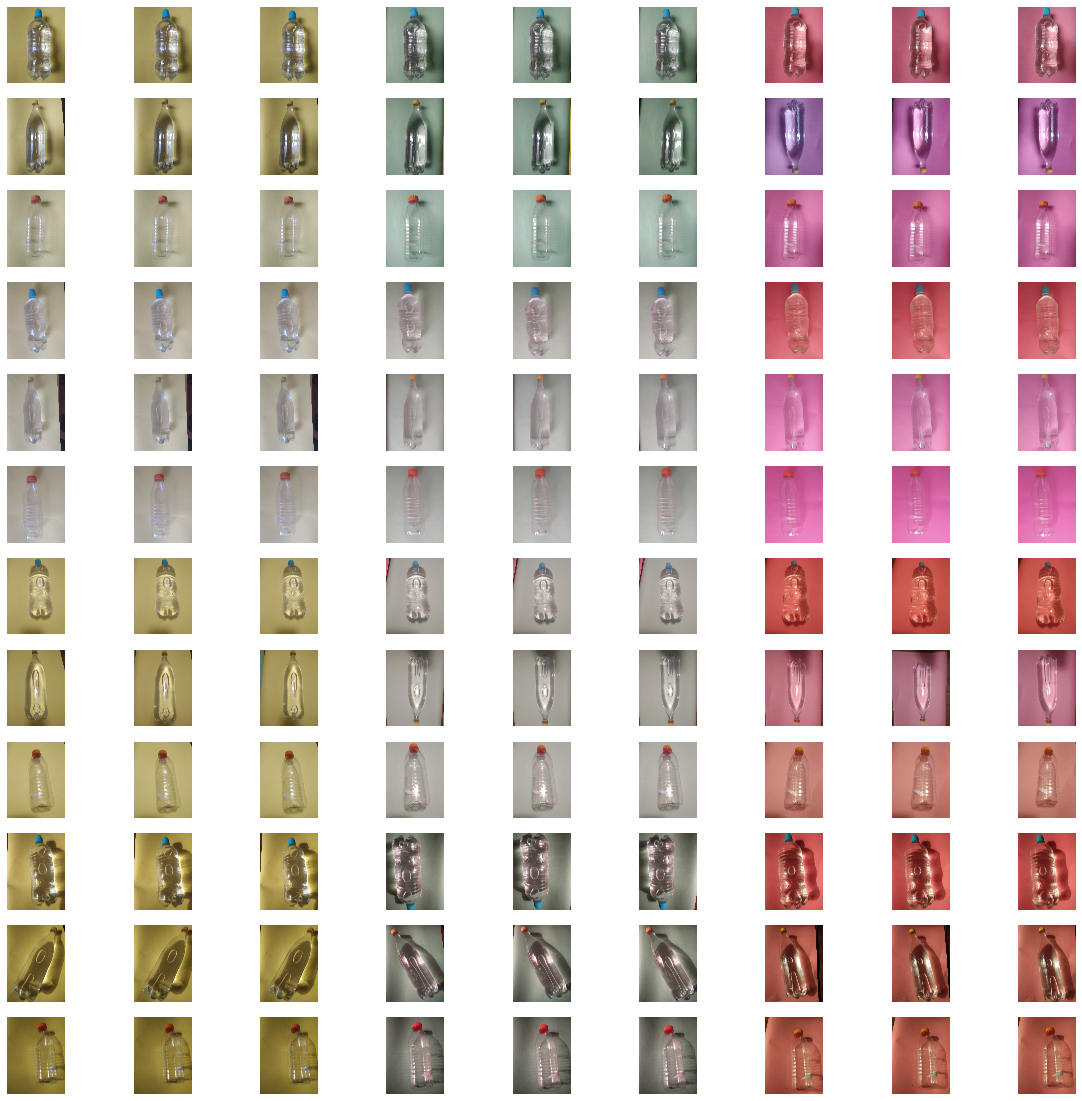

Fotos de tesoura


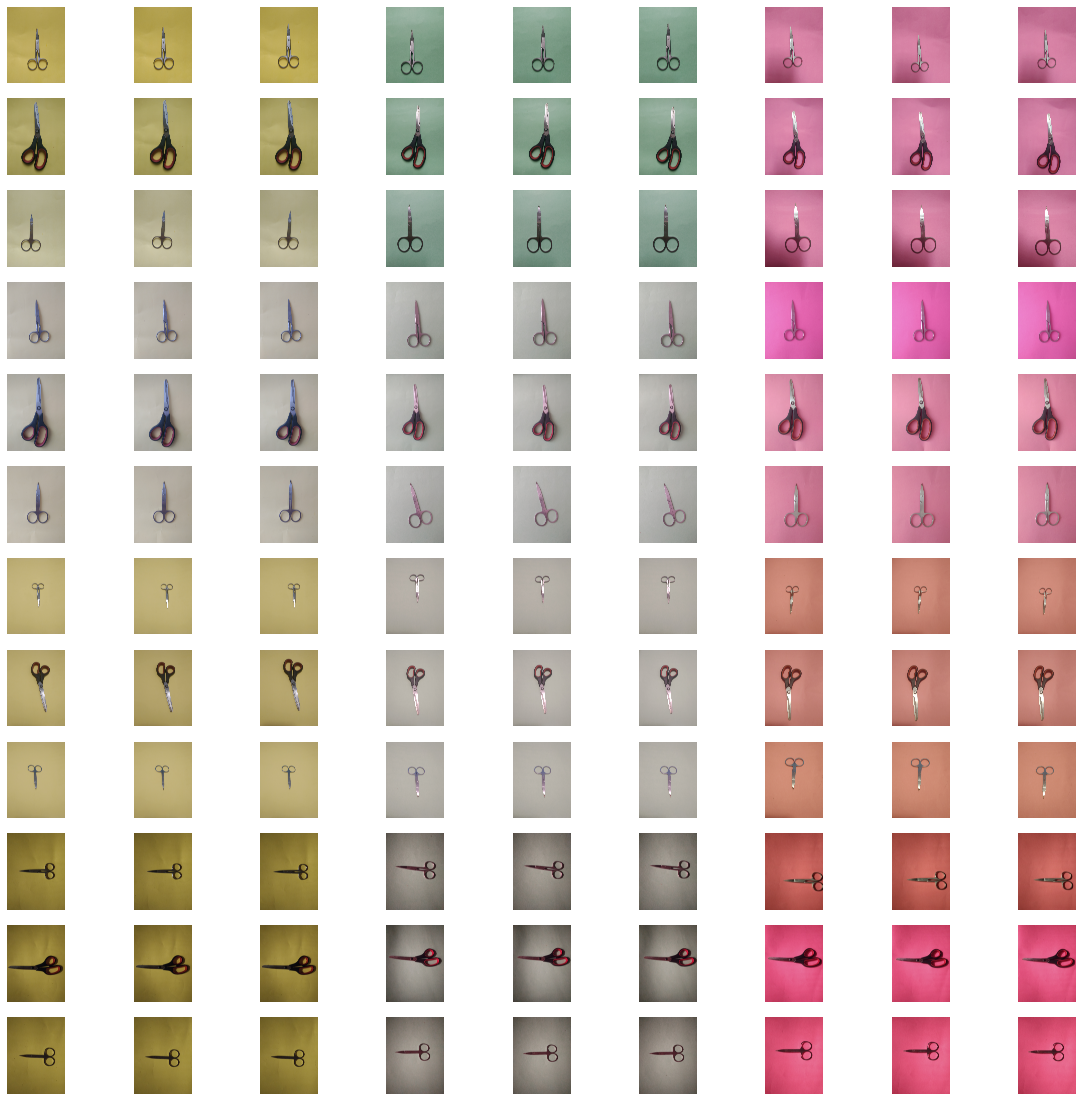

Fotos de livro


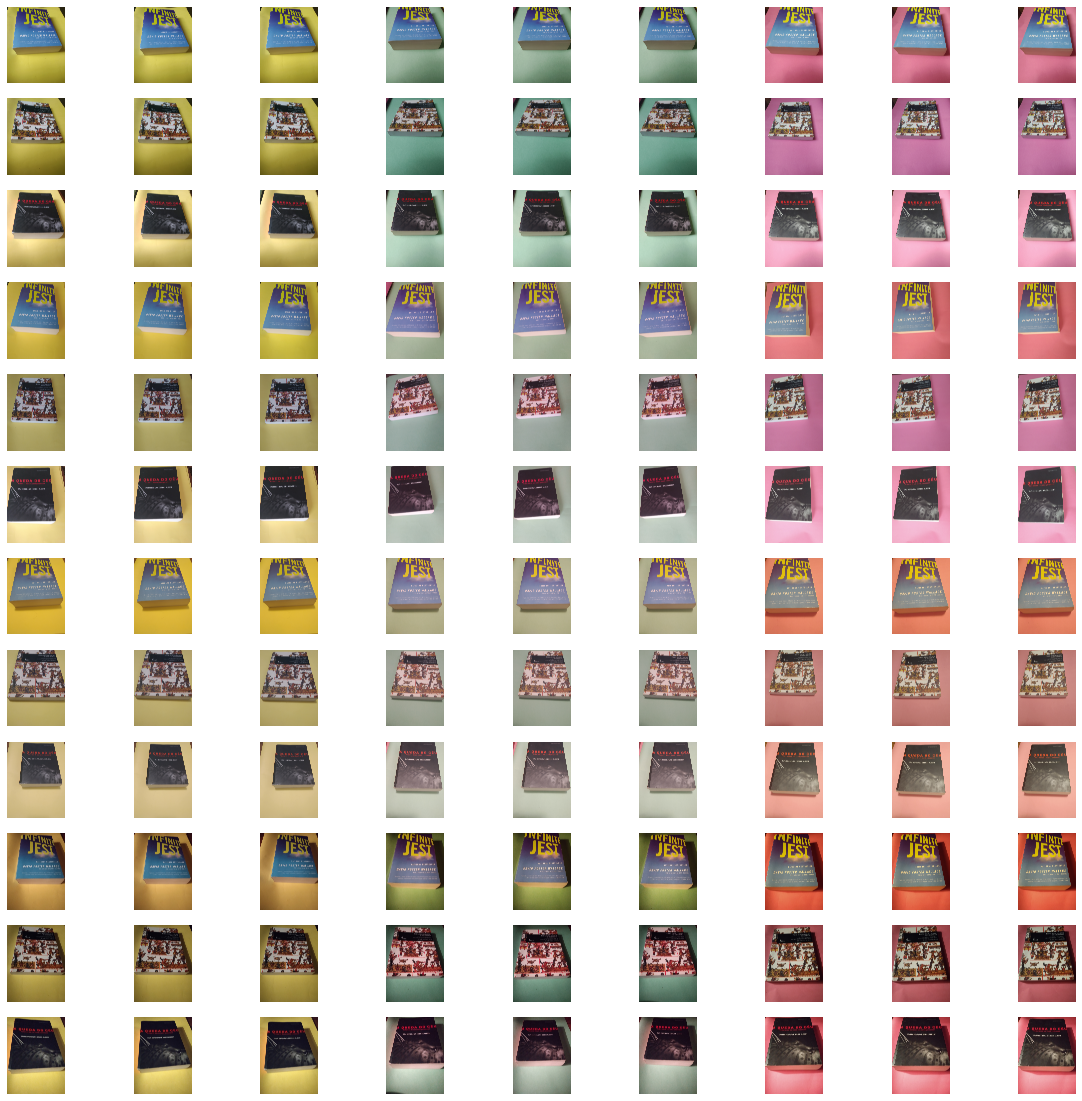

In [13]:
#VISUALIZAÇÃO MNIST-LIKE
for i in range(len(df_list)):
  print_imgset(df_list[i])